In [30]:
import numpy as np
import math as m
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import norm
import yfinance as yf
from dateutil import parser
from datetime import datetime
from pandas_datareader.data import DataReader as dr
from scipy.interpolate import CubicSpline
%matplotlib inline

In [31]:
ticker = 'MSFT' # set stock to be analysed, e.g. MSFT = Microsoft Corporation
stock = yf.Ticker('MSFT') # Pull information from Yahoo Finance

In [32]:
Maturity = stock.options  # pull the time to maturities for the option
today = datetime.today().date() # set todays date
maturityDates = np.zeros(len(Maturity))
# Process maturity dates to get in terms of 1 year 
for i in range(len(Maturity)):
    t = parser.parse(Maturity[i]).date() - today
    maturityDates[i] = t.days/365 

In [33]:
# Set the strikes so they are the same for each maturity
maxStrike = np.zeros(len(Maturity)) # placeholder
minStrike = np.zeros(len(Maturity)) # placeholder
for i in range(len(Maturity)):
    maxStrike[i] = stock.option_chain(Maturity[i]).calls.iloc[:,2].max() # Find the max strike price at each maturity
    minStrike[i] = stock.option_chain(Maturity[i]).calls.iloc[:,2].min() # Find the minimum strike price ate each maturity
overallMax = maxStrike.min() # Find the largest strike price each maturity has in common
overallMin = minStrike.max() # Find the smallest strike price each maturity has in common

In [34]:
NewStrike = np.arange(overallMin, overallMax + 1) # create a new array for strike prices

In [35]:
yahoo_IV = pd.DataFrame(columns=Maturity) # Dataframe for implied volatility
# Use the implied volitility data provided in yahoo finance
for i in range(len(Maturity)):
# Uncomment below if you want to interpolate the implied volatility linearly
#     yahoo_IV[Maturity[i]] = np.interp(NewStrike, tsla.option_chain(Maturity[i]).calls.iloc[:,2],
#                                      tsla.option_chain(Maturity[i]).calls.iloc[:,10])

# Uncomment below if you want to interpolate the implied volatility using a cubic spline
    YahooSpline = CubicSpline(stock.option_chain(Maturity[i]).calls.iloc[:,2],
                                       stock.option_chain(Maturity[i]).calls.iloc[:,10], bc_type='natural')
    yahoo_IV[Maturity[i]] = YahooSpline(NewStrike)
yahoo_IV.set_index(NewStrike) 

,2021-09-17,2021-09-24,2021-10-01,2021-10-08,2021-10-15,2021-10-22,2021-10-29,2021-11-19,2021-12-17,2022-01-21,2022-03-18,2022-04-14,2022-06-17,2022-09-16,2023-01-20,2023-03-17,2023-06-16
270.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
271.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000011,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
272.0,0.000010,0.000010,0.000010,0.000011,0.000011,0.000011,0.000012,0.000011,0.000010,0.000010,0.000011,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
273.0,0.000010,0.000010,0.000010,0.000011,0.000011,0.000011,0.000012,0.000011,0.000010,0.000010,0.000011,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
274.0,0.000010,0.000010,0.000010,0.000011,0.000011,0.000011,0.000012,0.000011,0.000010,0.000010,0.000011,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366.0,0.501559,0.249797,0.260837,0.125011,0.125102,0.125946,0.124891,0.130420,0.056111,0.062510,0.062457,0.062704,0.065215,0.029947,0.031283,0.031268,0.031233
367.0,0.501937,0.249745,0.263471,0.125011,0.125205,0.125661,0.124852,0.131733,0.056291,0.062499,0.062445,0.062751,0.065872,0.028594,0.031309,0.031272,0.031226
368.0,0.501537,0.249797,0.260691,0.125011,0.125260,0.125398,0.124872,0.130341,0.057299,0.062488,0.062458,0.062701,0.065176,0.027898,0.031323,0.031271,0.031233
369.0,0.500760,0.249902,0.255276,0.125010,0.125213,0.125174,0.124930,0.127636,0.059313,0.062488,0.062484,0.062604,0.063823,0.028554,0.031311,0.031267,0.031246


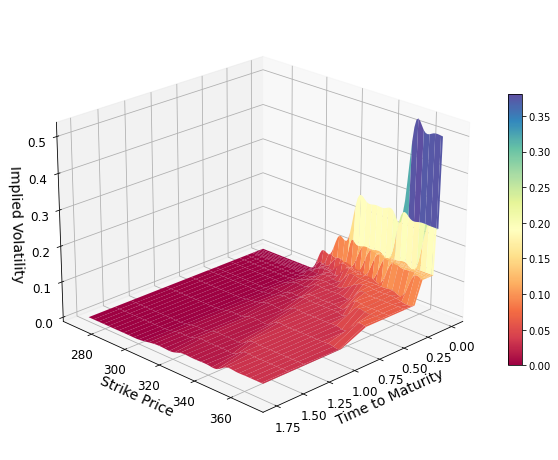

In [36]:
# plot volatility surface
yahoo_IV_np = yahoo_IV.to_numpy()
# 3D surface plot of matrix V
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
X, Y =np.meshgrid(maturityDates, NewStrike)
s = ax.plot_surface(X, Y, yahoo_IV_np, cmap = 'Spectral')
ax.set_xlabel('Time to Maturity', fontsize=14)
ax.set_ylabel('Strike Price', fontsize=14)
ax.set_zlabel('Implied Volatility', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.zaxis.set_tick_params(labelsize=12)
# ax.set_title('Implied Volatility from Yahoo', fontsize=16)
fig.colorbar(s, shrink=0.5, aspect=20)
ax.view_init(22.5,45)
plt.show()